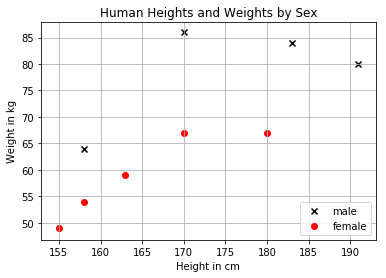

In [15]:
import numpy as np
import matplotlib.pyplot as plt

X_train = np.array([
    [158, 64],
    [170, 86],
    [183, 84],
    [191, 80],
    [155, 49],
    [163, 59],
    [180, 67],
    [158, 54],
    [170, 67]
])
y_train = ['male', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'female']

plt.figure()
plt.title('Human Heights and Weights by Sex')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

for i, x in enumerate(X_train):
    if y_train[i] == 'male':
        c1 = plt.scatter(x[0], x[1], c='k', marker='x')
    else:
        c2 = plt.scatter(x[0], x[1], c='r', marker='o')
plt.grid(True)
plt.legend((c1,c2),('male','female'),loc='lower right')
# plt.show()

In [18]:
x = np.array([[155,70]])
dis = np.sqrt(np.sum((X_train-x)**2 ,axis = 1))
dis

array([ 6.70820393, 21.9317122 , 31.30495168, 37.36308338, 21.        ,
       13.60147051, 25.17935662, 16.2788206 , 15.29705854])

In [22]:
nearset_k_neighbor = dis.argsort()[0:3]
k_genders = [y_train[i] for i in nearset_k_neighbor]
k_genders

['male', 'female', 'female']

In [25]:
from collections import Counter
# b = Counter(np.take(y_train, dis.argsort()[0:3]))
b = Counter(k_genders)
b # Counter({'male': 1, 'female': 2})

Counter({'male': 1, 'female': 2})

In [31]:
# help(Counter.most_common)
# most_common(self, n=None)
#     List the n most common elements and their counts from the most
#     common to the least.  If n is None, then list all element counts.
b.most_common(1) # [('female', 2), ('male', 1)]
b.most_common(1)[0][0] # 'female'

'female'

In [33]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier

lb = LabelBinarizer()
y_train_lb = lb.fit_transform(y_train)
y_train_lb

array([[1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [39]:
K=3
clf = KNeighborsClassifier(n_neighbors=K)
clf.fit(X_train,y_train_lb.ravel())
pred_gender = clf.predict(x)
pred_gender # array([0])
pred_label_gender = lb.inverse_transform(pred_gender)
pred_label_gender # array(['female'], dtype='<U6')

array(['female'], dtype='<U6')

In [43]:
X_test = np.array([
    [168, 65],
    [180, 96],
    [160, 52],
    [169, 67]
])
y_test = ['male', 'male', 'female', 'female']
y_test_lb = lb.transform(y_test)

pred_lb = clf.predict(X_test)
print('Predicted labels: %s' % lb.inverse_transform(pred_lb))

Predicted labels: ['female' 'male' 'female' 'female']


In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_lb, pred_lb)
from sklearn.metrics import precision_score
precision_score(y_test_lb, pred_lb)

1.0

In [46]:
# 召回率： 男预测男/(男预测男+男预测女)
from sklearn.metrics import recall_score
recall_score(y_test_lb, pred_lb)

0.5

In [47]:
from sklearn.metrics import f1_score
f1_score(y_test_lb, pred_lb) # 0.6667

0.6666666666666666

In [54]:
from sklearn.metrics import classification_report
# help(classification_report)
# classification_report(y_true, y_pred, labels=None, target_names=None, s
#        ample_weight=None, digits=2, output_dict=False, zero_division='warn')
print(classification_report(y_test_lb, pred_lb, target_names=['male','female'], labels=[1,0]))

              precision    recall  f1-score   support

        male       1.00      0.50      0.67         2
      female       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



In [72]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

X_train = np.array([
    [158,  1],
    [170,  1],
    [183,  1],
    [191,  1],
    [155,  0],
    [163,  0],
    [180,  0],
    [158,  0],
    [170,  0]
])
y_train = [64,86,84,80,49,59,67,54,67]

X_test = np.array([
    [168,  1],
    [180,  1],
    [160,  0],
    [169,  0]
])
y_test = [65,96,52,67]

K = 3
clf = KNeighborsRegressor(n_neighbors=K)
clf.fit(X_train, y_train)
predictions = clf.predict(np.array(X_test))
predictions # array([70.66666667, 79.        , 59.        , 70.66666667])

# help(r2_score)
# R^2 (coefficient of determination)
r2_score(y_test, predictions) # 0.6290565226735438

# 平均绝对值误差
mean_absolute_error(y_test, predictions) # 8.333333333333336

# 平均平方误差
mean_squared_error(y_test, predictions)  # 95.8888888888889

95.8888888888889

In [70]:
# from scipy.spatial.distance import euclidean
# # help(euclidean) # 欧氏距离
# X_train = np.array([
#     [1700,1],
#     [1600,0]
# ])
# X_test = np.array([1640,1]).reshape(1,-1)
# print(euclidean(X_train[0,:], X_test))
# print(euclidean(X_train[1,:], X_test))
# # 60.0
# # 40.01249804748511

# X_train = np.array([
#     [1.7,1],
#     [1.6,0]
# ])
# X_test = np.array([1.64,1]).reshape(1,-1)
# print(euclidean(X_train[0,:], X_test))
# print(euclidean(X_train[1,:], X_test))
# # 0.06000000000000005
# # 1.0007996802557444

60.0
40.01249804748511
0.06000000000000005
1.0007996802557444


In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

print(X_train)
print(X_train_scaled)

[[158   1]
 [170   1]
 [183   1]
 [191   1]
 [155   0]
 [163   0]
 [180   0]
 [158   0]
 [170   0]]
[[-0.9908706   1.11803399]
 [ 0.01869567  1.11803399]
 [ 1.11239246  1.11803399]
 [ 1.78543664  1.11803399]
 [-1.24326216 -0.89442719]
 [-0.57021798 -0.89442719]
 [ 0.86000089 -0.89442719]
 [-0.9908706  -0.89442719]
 [ 0.01869567 -0.89442719]]


In [75]:
X_test_scaled = scaler.transform(X_test)
clf.fit(X_train_scaled, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [81]:
pred = clf.predict(X_test_scaled)
pred # array([78.        , 83.33333333, 54.        , 64.33333333])

# R^2 (coefficient of determination)
r2_score(y_test, pred) # 0.6706425961745109

# 平均绝对值误差
mean_absolute_error(y_test, pred) # 7.583333333333336

# 平均平方误差
mean_squared_error(y_test, pred)  # 85.13888888888893

85.13888888888893